In [232]:
import pandas as pd
import numpy as np

tsv = 'proteome_ms2.csv'
df = pd.read_csv(tsv)
df.head()

,Gene Symbol,shCD44-1,shCD44-2,shCD44-3,shCD44-4,shLuc-1,shLuc-2,shLuc-3,shLuc-4,N_peptides,Species
0,TXNDC12,181.1,208.9,197.6,151.4,192.0,115.2,164.7,205.9,1.0,Homo sapiens
1,APIP,219.7,212.1,188.1,226.9,226.9,228.2,241.7,250.1,2.0,Homo sapiens
2,Rbfox2,260.2,258.7,281.6,326.5,298.0,315.7,324.3,269.1,2.0,Mus musculus
3,Parva,218.8,193.2,148.4,141.9,200.6,109.8,150.1,211.4,1.0,Mus musculus
4,NNT,505.3,456.8,401.5,499.3,517.3,670.8,651.5,706.0,3.0,Homo sapiens


In [233]:
human = df[['Homo sapiens' in s for s in df['Species']]]
mouse = df[['Mus musculus' in s for s in df['Species']]]
peptides = df.loc[df['N_peptides'] >= 2]
mouse.head()

,Gene Symbol,shCD44-1,shCD44-2,shCD44-3,shCD44-4,shLuc-1,shLuc-2,shLuc-3,shLuc-4,N_peptides,Species
2,Rbfox2,260.2,258.7,281.6,326.5,298.0,315.7,324.3,269.1,2.0,Mus musculus
3,Parva,218.8,193.2,148.4,141.9,200.6,109.8,150.1,211.4,1.0,Mus musculus
8,Acadm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Mus musculus
11,Rprd1b,116.9,118.7,130.7,153.4,117.7,130.1,132.6,138.7,4.0,Mus musculus
12,Fxr1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Mus musculus


In [234]:
def count_nans(data, column):
    s = []
    for i in data.index:
        s.append(data.loc[[i]].isna().sum().sum())
    data['NaN_count'] = s        
    for i in l:
        length = len(data[(data['NaN_count'] == i)])
        nan_count_df.loc[i, column] = length

In [235]:
l = np.arange(0, 9, 1)
z = ['0']*8
nan_count_df = pd.DataFrame({'Count': z})
count_nans(df, 'All')
count_nans(human, 'Human')
count_nans(mouse, 'Mouse')
count_nans(df, 'Peptides>=2')

<ipython-input-234-9af5f89bb049>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NaN_count'] = s
<ipython-input-234-9af5f89bb049>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NaN_count'] = s


In [236]:
nan_count_df = nan_count_df.drop('Count', axis=1)
nan_count_df.index.name = 'NaN_count'

nan_count_df.head()

,All,Human,Mouse,Peptides>=2
NaN_count,,,,
0,2402.0,1649.0,753.0,2402.0
1,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [237]:
df_clean = df.dropna()
df_clean_num = df_clean.iloc[:, 1:9]

In [238]:
df_clean_num = df_clean_num.add(1)
df_clean_num = df_clean_num.apply(np.log2)

In [239]:
df_clean_num.head()

,shCD44-1,shCD44-2,shCD44-3,shCD44-4,shLuc-1,shLuc-2,shLuc-3,shLuc-4
0,7.508587,7.713558,7.633722,7.251719,7.592457,6.860466,7.372430,7.692790
1,7.785943,7.735387,7.563006,7.832257,7.832257,7.840463,7.923030,7.972118
2,8.029011,8.020702,8.142618,8.355351,8.224002,8.306973,8.345627,8.077350
3,7.780048,7.601399,7.223036,7.158862,7.655352,6.791814,7.239360,7.730640
4,8.983849,8.838574,8.652845,8.966650,9.017644,9.391888,9.349834,9.465566


In [240]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df_clean_num.T
pca = PCA(n_components=2)
X = pca.fit_transform(X)

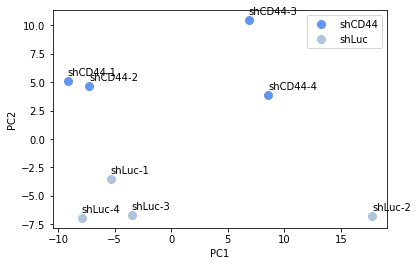

In [241]:
labels = ['PC1', 'PC2']
genes = ['shCD44']*4 + ['shLuc']*4
pca_df = pd.DataFrame(X, index=df_clean_num.columns, columns=labels)
pca_df['Gene'] = genes 
groups = pca_df.groupby('Gene')
fig, ax = plt.subplots()
cols = (['cornflowerblue', 'lightsteelblue'])
i=0
for name, group in groups:
    plt.plot(group['PC1'], group['PC2'], marker='o', color=cols[i], linestyle="", markersize=8, label=name)
    i+=1
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]+0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

/Users/kseniakirdey/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


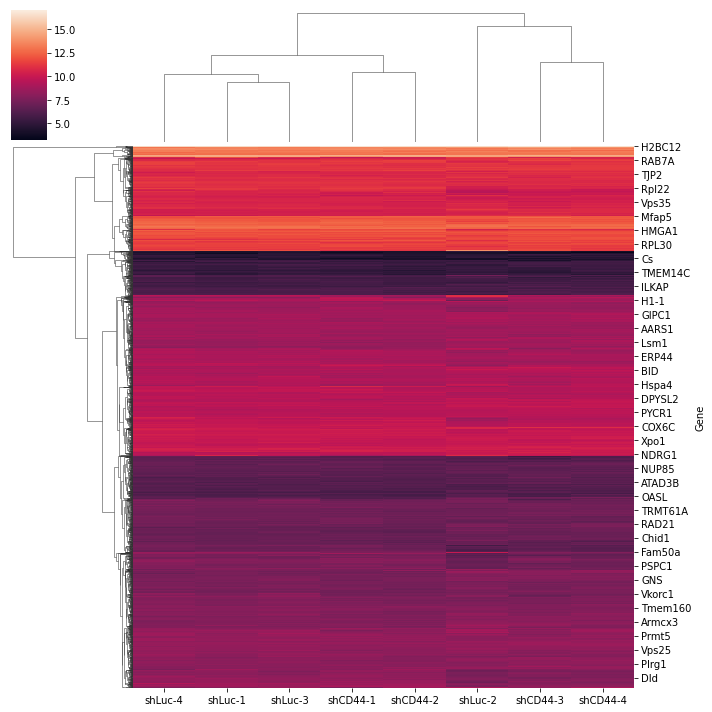

In [242]:
import seaborn as sns
df_clean_num['Gene'] = df_clean['Gene Symbol']
df_clean_num = df_clean_num.set_index('Gene')
#pca_df = pca_df.drop('Gene', axis=1)
cl = sns.clustermap(df_clean_num)
cl.savefig('clustermap_sil.png')

## Transcriptome

In [262]:
tsv = 'FPKM_transcriptome.tsv'
df2 = pd.read_csv(tsv, sep='\t')

In [263]:
df2 = df2.drop(df2.columns[1:8], axis=1)

In [264]:
df2_clean = df2.dropna()
df2_clean_num = df2_clean.iloc[:, 1:-1]
df2_clean_num.head()

,8_S10,9_S19,10_S14,11_S17,12_S2,13_S8,14_S9,15_S3,16_S11,17_S7,18_S16,19_S5,20_S6,21_S1
0,2.936041,2.301883,2.253616,3.096900,3.030097,3.010942,2.941350,2.492964,2.191949,2.529076,2.301188,2.444784,2.409013,1.616723
1,2.809449,2.592489,2.528474,3.033814,2.593269,2.610375,2.936198,2.820633,2.501032,2.790653,2.850125,2.910769,2.615168,2.405928
2,1.585749,1.299573,1.242396,1.789735,1.576605,1.655656,1.572609,1.753005,1.849781,2.034633,1.974875,2.085527,1.878801,1.264967
3,4.335331,4.842072,4.849266,4.240228,5.026604,4.995256,6.623710,5.838030,5.130113,4.375115,4.699923,5.105430,5.370768,7.155946
4,2.460156,2.992172,3.052121,2.362177,2.663659,2.314845,2.780088,2.612922,2.355391,1.595380,1.509440,2.064565,2.217506,3.833460


In [265]:
X2 = df2_clean_num.T
pca2 = PCA(n_components=2)
X2 = pca2.fit_transform(X2)

In [266]:
columns = ['shCD44']*7 + ['shLuc']*7
j = 0
for i in columns:
    columns[j] = i + ' ' + df2_clean_num.columns[j]
    j+=1

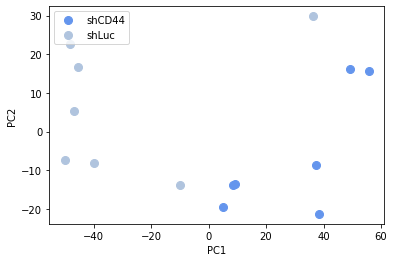

In [267]:
labels = ['PC1', 'PC2']
pca_df2 = pd.DataFrame(X2, index=df2_clean_num.columns, columns=labels)
cols = ['shCD44']*7 + ['shLuc']*7
pca_df2['Gene'] = cols
groups2 = pca_df2.groupby('Gene')
fig, ax = plt.subplots()
cols = (['cornflowerblue', 'lightsteelblue'])
i=0
for name, group in groups2:
    plt.plot(group['PC1'], group['PC2'], marker='o', color=cols[i], linestyle="", markersize=8, label=name)
    i+=1
'''for sample in pca_df2.index:
    plt.annotate(sample, (pca_df2.PC1.loc[sample], pca_df2.PC2.loc[sample]+0.1))'''
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('PCA_tr.png')

/Users/kseniakirdey/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


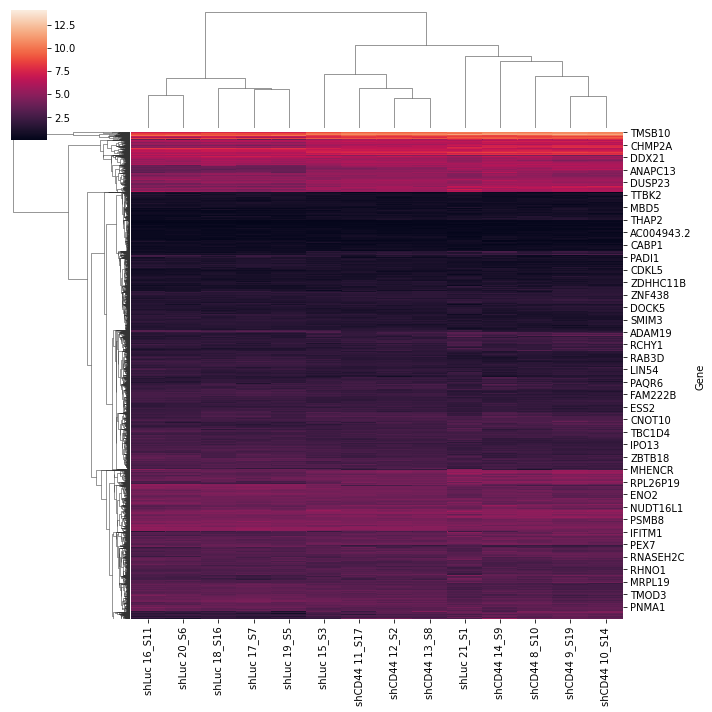

In [268]:
li = df2_clean['Gene'].to_list()
df2_clean_num.columns = columns
df2_clean_num['Gene'] = li
df2_clean_num = df2_clean_num.set_index('Gene')
cl = sns.clustermap(df2_clean_num)
cl.savefig('cl_transcriptome.png')